## MNIST 숫자 이미지 인식 문제 

In [26]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

### MNIST 데이터 로딩 

In [27]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### 이미지 4개를 테스트로 그레이 스케일로 출력해보기

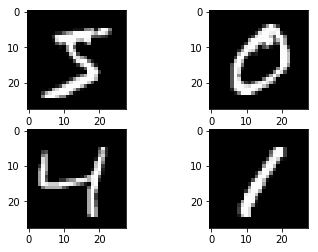

In [28]:
import matplotlib.pyplot as plt

plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

### 이미지 정보를 이제 일차원 리스트로 변경

In [29]:
X_train.shape

(60000, 28, 28)

In [30]:
# flatten 28*28(이차원) images to a 784 vector(1차원) for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train_cnv = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test_cnv = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
print(num_pixels)

784


### 이미지의 스케일을 0-255에서 0-1로 변경

In [31]:
X_train_cnv = X_train_cnv / 255
X_test_cnv = X_test_cnv / 255

### Classification 결과에 대해 One-hot encoding 수행 

In [32]:
print(y_test) # 아래 결과를 one hot encoding으로 바꾸어야 마지막 softmax적용이 가능

[7 2 1 ... 4 5 6]


In [8]:
y_train = np_utils.to_categorical(y_train) # one hot encoding을 수행하는 함수가 categorical
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [9]:
print(y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### NN 모델 빌딩

In [10]:
model = Sequential()
model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


### 모델 학습 및 정확도 분석

In [12]:
# 모델 학습
model.fit(X_train_cnv,
    y_train,
    epochs=10,
    batch_size=200,
    verbose=2
)

# 모델 정확도 분석 (scikit-learn의 score에 해당)
scores = model.evaluate(X_test_cnv, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
 - 4s - loss: 0.2810 - acc: 0.9205
Epoch 2/10
 - 4s - loss: 0.1119 - acc: 0.9683
Epoch 3/10
 - 4s - loss: 0.0724 - acc: 0.9786
Epoch 4/10
 - 4s - loss: 0.0513 - acc: 0.9857
Epoch 5/10
 - 4s - loss: 0.0368 - acc: 0.9896
Epoch 6/10
 - 4s - loss: 0.0263 - acc: 0.9931
Epoch 7/10
 - 4s - loss: 0.0212 - acc: 0.9944
Epoch 8/10
 - 5s - loss: 0.0148 - acc: 0.9965
Epoch 9/10
 - 4s - loss: 0.0105 - acc: 0.9977
Epoch 10/10
 - 4s - loss: 0.0093 - acc: 0.9979
Baseline Error: 1.86%


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


## Now let's try to load a digit image and see how it works

### Predict using one from training set

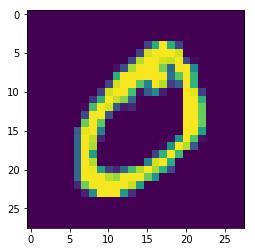

[0]


In [14]:
plt.imshow(X_train[1])
plt.show()

input = X_train_cnv[1]
X = input.reshape(1,784)
pr = model.predict_classes(X)
print (pr)

### Predict using digit image from directory

#### Image conversion to 28*28 and save it "output.jpg"

In [20]:
from PIL import Image, ImageFilter
import PIL.ImageOps 
from numpy import array

class ScaleUtils():
    def __init__(self, p, h=28, w=28):
        self.im = Image.open(p)
        self.size = (h,w)
    def toGrey(self):
        self.im = self.im.convert("L")
        return self
    def resize(self):
        self.im = self.im.resize(self.size)
        return self
    def invert(self):
        self.im = PIL.ImageOps.invert(self.im)
        return self
    def getArray(self):
        return array(self.im)
    def getImage(self):
        return self.im
    def run(self):
        return self.toGrey().resize().getArray()
    
# this particular one requires invert
ScaleUtils("./digit_image/test_8_digit.png").toGrey().resize().invert().getImage().save("output.jpg", "JPEG")

In [33]:
from IPython.display import HTML
HTML(open("input.html").read())

input = data
X=input.reshape(1,784)
pr = model.predict_classes(X)
print(pr)

FileNotFoundError: [Errno 2] No such file or directory: 'input.html'

#### Predict conversioned image at "output.jpg"

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


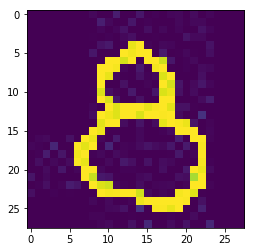

[8]


In [21]:
# 테스트 이미지가 output.jpg에 있음. 
from scipy.misc import imread
import matplotlib.pyplot as plt

im = imread("output.jpg")
plt.imshow(im)
plt.show()

input = im
X = input.reshape(1,784)
pr = model.predict_classes(X)
print (pr)